![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [47]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

filename_features = r"C:\Users\gerar\aula dados\aula1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\features_info.txt"

filename_labels =r"C:\Users\gerar\aula dados\aula1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\activity_labels.txt"

filename_subtrain = r"C:\Users\gerar\aula dados\aula1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\subject_train.txt"
filename_xtrain = r"C:\Users\gerar\aula dados\aula1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt"
filename_ytrain = r"C:\Users\gerar\aula dados\aula1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt"

filename_subtest = r"C:\Users\gerar\aula dados\aula1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\subject_test.txt"
ffilename_xtest = r"C:\Users\gerar\aula dados\aula1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt"
filename_ytest = r"C:\Users\gerar\aula dados\aula1\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], sep="#")
Names = features['nome_var'].tolist() 
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], )
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=Names)

y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'],)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=Names)
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\gerar\AppData\Local\Temp\ipykernel_14516\2470164030.py:26: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])
C:\Users\gerar\AppData\Local\Temp\ipykernel_14516\2470164030.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=Names)
C:\Users\gerar\AppData\Local\Temp\ipykernel_14516\2470164030.py:34: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=Names)


## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

In [49]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)
x_test_pad =  pd.DataFrame(X_test).apply(padroniza, axis=0)


CPU times: total: 172 ms
Wall time: 182 ms


# com padrão 

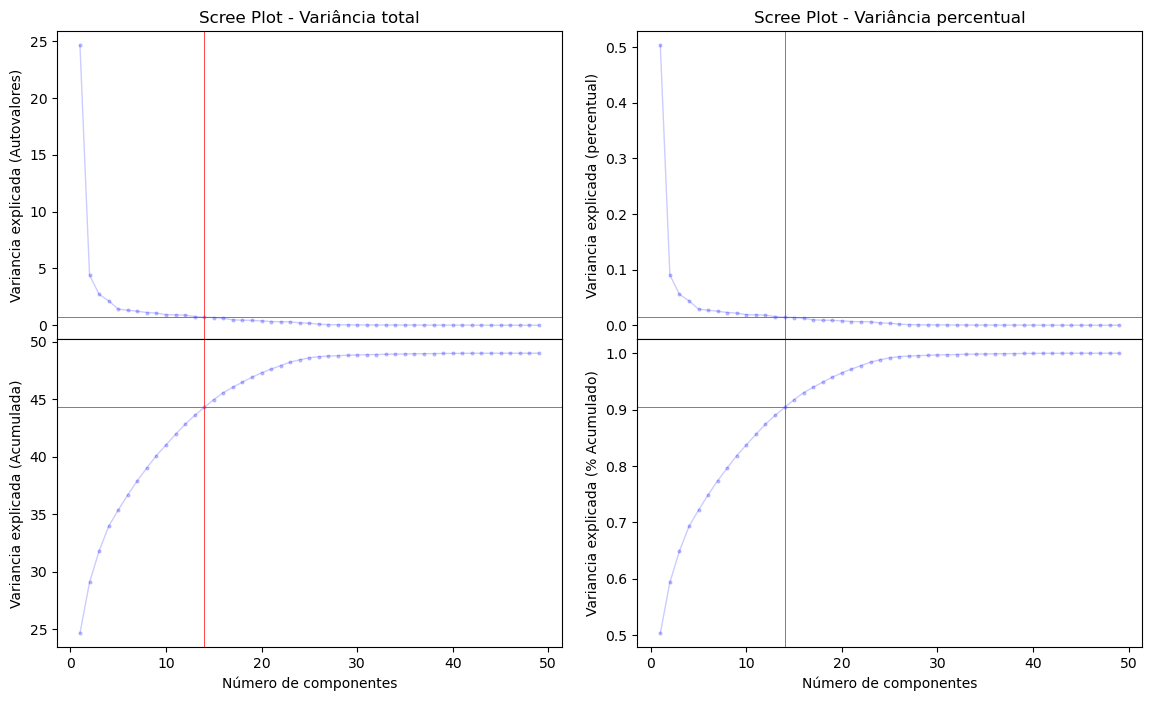

In [37]:
#com padrao
pca= PCA()
pcc = pca.fit(X_train_pad)
pcc.explained_variance_  / pcc.explained_variance_.sum()

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

# Número de componentes pelo critério 3
varexplicada = .90
ncomp_criterio3 = (pcc.explained_variance_ratio_.cumsum()<varexplicada).sum()+1


#Gráfico da variância nominal por qtd-componentes
num_componentes = np.arange(pcc.n_components_) + 1
ax[0,0].plot(num_componentes, pcc.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')

#Gráfico da variância nominal acumulada por qtd-componentes
ax[1,0].plot(num_componentes, pcc.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')

#Gráfico da variância percentual por qtd-componentes
ax[0,1].plot(num_componentes, pcc.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')

#Gráfico da variância percentual acumulada por qtd-componentes
ax[1,1].plot(num_componentes, pcc.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')

# linhas verticais de referência
ax[0,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)

# linhas horizontais
ncomp_criterio2 = 50
ax[0,0].axhline(y = pcc.explained_variance_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = pcc.explained_variance_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = pcc.explained_variance_ratio_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = pcc.explained_variance_ratio_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()


# Sem padrão 

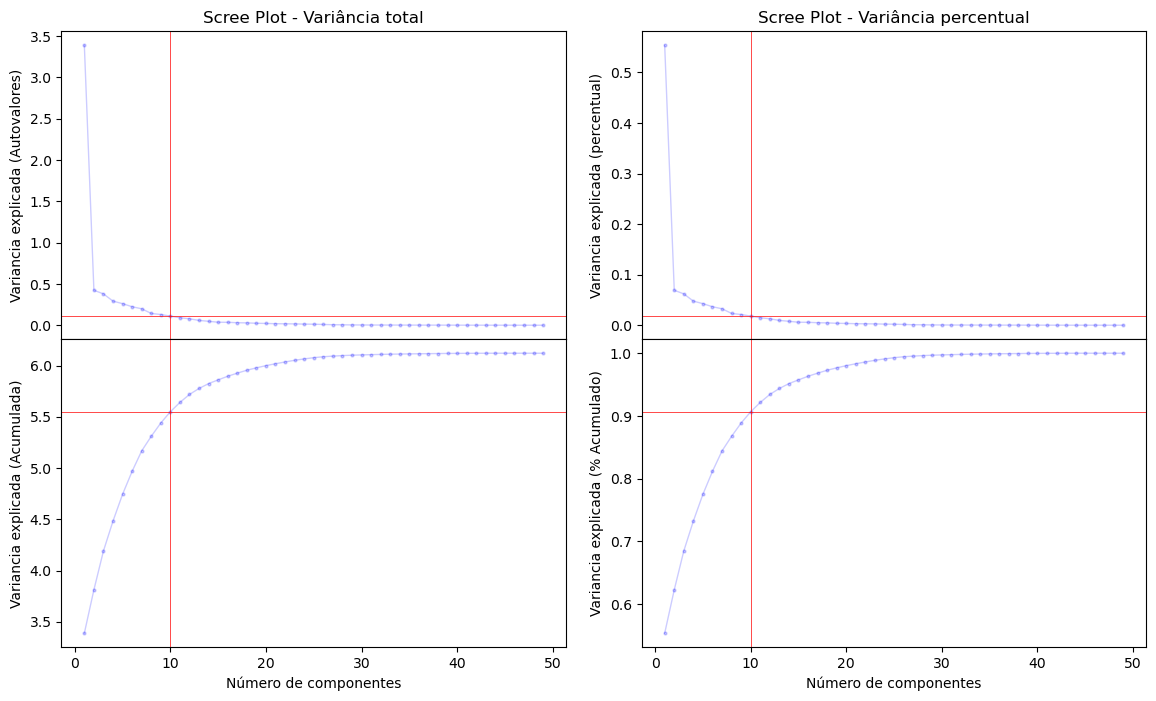

In [38]:
#sem padrao
pca= PCA()
pcc = pca.fit(X_train)
pcc.explained_variance_  / pcc.explained_variance_.sum()

fig, ax = plt.subplots(2, 2, sharex=True, figsize=(14, 8))
plt.subplots_adjust(hspace=0, wspace=.15)

varexplicada = .90
ncomp_criterio3 = (pcc.explained_variance_ratio_.cumsum()<varexplicada).sum()+1


num_componentes = np.arange(pcc.n_components_) + 1
ax[0,0].plot(num_componentes, pcc.explained_variance_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,0].set_title('Scree Plot - Variância total')
ax[0,0].set_xlabel('Número de componentes')
ax[0,0].set_ylabel('Variancia explicada (Autovalores)')




ax[1,0].plot(num_componentes, pcc.explained_variance_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,0].set_xlabel('Número de componentes')
ax[1,0].set_ylabel('Variancia explicada (Acumulada)')



ax[0,1].plot(num_componentes, pcc.explained_variance_ratio_, 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[0,1].set_title('Scree Plot - Variância percentual')
ax[0,1].set_xlabel('Número de componentes')
ax[0,1].set_ylabel('Variancia explicada (percentual)')




ax[1,1].plot(num_componentes, pcc.explained_variance_ratio_.cumsum(), 'o-', linewidth=1, color='blue', markersize=2, alpha=.2)
ax[1,1].set_xlabel('Número de componentes')
ax[1,1].set_ylabel('Variancia explicada (% Acumulado)')


ax[0,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axvline(x = ncomp_criterio3, color = 'r', linestyle = '-', linewidth=.5)


ncomp_criterio2 = 50
ax[0,0].axhline(y = pcc.explained_variance_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,0].axhline(y = pcc.explained_variance_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[0,1].axhline(y = pcc.explained_variance_ratio_[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)
ax[1,1].axhline(y = pcc.explained_variance_ratio_.cumsum()[ncomp_criterio3-1], color = 'r', linestyle = '-', linewidth=.5)

plt.show()


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [51]:
%%time
#pca
#compad
pcr = PCA().fit(X_train_pad)

pc_treinop = pcr.transform(X_train_pad)
pc_testep  = pcr.transform(x_test_pad)

n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_trainp = pd.DataFrame(pc_treinop[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_testep[:,:n], columns = colunas)


#sempad

pcr = PCA().fit(X_train_pad)
pc_treino = pcr.transform(X_train)
pc_teste  = pcr.transform(X_test)

n=10

colunas = ['cp'+str(x+1) for x in list(range(n))]

pc_train = pd.DataFrame(pc_treino[:,:n], columns = colunas)
pc_test  = pd.DataFrame( pc_teste[:,:n], columns = colunas)



CPU times: total: 46.9 ms
Wall time: 54 ms


In [53]:

#compad
clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_trainp, y_train)

train_scores = clf.score(pc_trainp, y_train)

#valid_scores = clf.score(X_valid, y_valid)

test_scores = clf.score(pc_testp, y_test)
print(train_scores)
print(test_scores)

0.7819640914036997
0.3481506616898541


In [54]:
#sempad

clf = DecisionTreeClassifier(random_state=1234, ccp_alpha=0.001).fit(pc_train, y_train)

train_scores = clf.score(pc_train, y_train)

#valid_scores = clf.score(X_valid, y_valid)

test_scores = clf.score(pc_test, y_test)
print(train_scores)
print(test_scores)

0.7810119695321001
0.6895147607736681
